In [302]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
sns.set_style('whitegrid')
import copy

In [303]:
NUM_TRADING_DAYS = 252
NUM_SIMULATIONS = 10000 * 5

stocks_list = ['YESBANK.NS', 'GRASIM.NS', 'JSWENERGY.NS', 'CIPLA.NS', 'TCS.NS', 'EMAMILTD.NS']
start_date = "2021-05-18"
end_date = "2024-05-18"

In [304]:
stock_data = {}
for stock in stocks_list:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start=start_date, end=end_date)['Close']

stock_prices = pd.DataFrame(stock_data)
stock_prices

,YESBANK.NS,GRASIM.NS,JSWENERGY.NS,CIPLA.NS,TCS.NS,EMAMILTD.NS
Date,,,,,,
2021-05-18 00:00:00+05:30,13.350000,1371.365967,113.080101,868.253479,2888.121094,487.685883
2021-05-19 00:00:00+05:30,13.300000,1368.706787,115.082825,887.446533,2881.763428,483.076141
2021-05-20 00:00:00+05:30,13.250000,1354.475098,114.692047,907.326843,2861.192627,475.187225
2021-05-21 00:00:00+05:30,13.350000,1351.126343,114.398964,909.977600,2880.360840,478.941589
2021-05-24 00:00:00+05:30,13.850000,1350.042969,114.203575,914.248108,2881.295898,486.212677
...,...,...,...,...,...,...
2024-05-13 00:00:00+05:30,22.250000,2385.199951,574.400024,1414.650024,3919.313721,518.900024
2024-05-14 00:00:00+05:30,22.549999,2372.050049,599.700012,1357.349976,3873.049805,515.299988
2024-05-15 00:00:00+05:30,22.600000,2369.699951,598.049988,1406.699951,3852.399902,526.900024


In [305]:
NUM_TRADING_DAYS = stock_prices.shape[0]

In [306]:
# Calculateing logarithmic returns
returns_df = stock_prices.copy().reset_index().drop(columns=['Date'])
a = np.array(returns_df).T
log_returns = pd.DataFrame(np.log((a[:, 1:] / a[:, :-1]).T), columns = stock_prices.columns, index = stock_prices.index[1:])
log_returns

,YESBANK.NS,GRASIM.NS,JSWENERGY.NS,CIPLA.NS,TCS.NS,EMAMILTD.NS
Date,,,,,,
2021-05-19 00:00:00+05:30,-0.003752,-0.001941,0.017556,0.021865,-0.002204,-0.009497
2021-05-20 00:00:00+05:30,-0.003766,-0.010452,-0.003401,0.022154,-0.007164,-0.016465
2021-05-21 00:00:00+05:30,0.007519,-0.002475,-0.002559,0.002917,0.006677,0.007870
2021-05-24 00:00:00+05:30,0.036769,-0.000802,-0.001709,0.004682,0.000325,0.015067
2021-05-25 00:00:00+05:30,-0.018215,0.003023,0.010213,0.004660,0.015371,-0.023137
...,...,...,...,...,...,...
2024-05-13 00:00:00+05:30,-0.011173,0.003381,0.007251,0.054548,0.013747,-0.007488
2024-05-14 00:00:00+05:30,0.013393,-0.005528,0.043103,-0.041348,-0.011874,-0.006962
2024-05-15 00:00:00+05:30,0.002215,-0.000991,-0.002755,0.035712,-0.005346,0.022262


In [307]:
# Calculating average annual returns

log_returns.mean() * NUM_TRADING_DAYS

YESBANK.NS      0.544711
GRASIM.NS       0.570235
JSWENERGY.NS    1.660850
CIPLA.NS        0.477708
TCS.NS          0.283710
EMAMILTD.NS     0.057287
dtype: float64

In [308]:
# Calculating annual volatility

log_returns.std() / np.sqrt(NUM_TRADING_DAYS)

YESBANK.NS      0.000975
GRASIM.NS       0.000550
JSWENERGY.NS    0.001081
CIPLA.NS        0.000538
TCS.NS          0.000475
EMAMILTD.NS     0.000642
dtype: float64

In [309]:
# Generating random weights and applying markowitz method
portfolio_minimum_weights = [[0.04, 0.1], [0.2, 0.12, 0.1], [0.11]]
basket_minimum_weights = [0.3, 0.42, 0.2]

total_minimum_sum = np.sum(basket_minimum_weights)
portfolio_minimum_weights_sum = [np.sum(i) for i in portfolio_minimum_weights]

portfolio_weights = []
portfolio_returns = []
basket_weights = []
portfolio_risks = []

for _ in range(NUM_SIMULATIONS):
    # generating random weights
    tmp_basket_assignment = copy.deepcopy(basket_minimum_weights.copy())
    tmp_weights_assignment = copy.deepcopy(portfolio_minimum_weights)
    left = 1 - total_minimum_sum
    current_basket_weights_sum = 0
    for i, basket in enumerate(basket_minimum_weights):
        tmp_basket_assignment[i] = np.random.uniform(low = basket_minimum_weights[i], high = basket_minimum_weights[i] + left)
        left = 1 - (total_minimum_sum + tmp_basket_assignment[i] - basket_minimum_weights[i])
        if i != len(basket_minimum_weights) - 1:
            current_basket_weights_sum += tmp_basket_assignment[i]
        else:
            tmp_basket_assignment[i] = 1 - current_basket_weights_sum
        left_weights = tmp_basket_assignment[i] - portfolio_minimum_weights_sum[i]
        current_portfolio_weights_sum = 0
        for j, weight in enumerate(portfolio_minimum_weights[i]):
            tmp_weights_assignment[i][j] = np.random.uniform(low = portfolio_minimum_weights[i][j], high = portfolio_minimum_weights[i][j] + left_weights)
            if j != len(portfolio_minimum_weights[i]) - 1:
                current_portfolio_weights_sum += tmp_weights_assignment[i][j]
            else:
                tmp_weights_assignment[i][j] = tmp_basket_assignment[i] - current_portfolio_weights_sum
            left_weights = tmp_basket_assignment[i] - (portfolio_minimum_weights_sum[i] + tmp_weights_assignment[i][j] - portfolio_minimum_weights[i][j])
    basket_weights.append(tmp_basket_assignment)
    w = np.array([j for i in tmp_weights_assignment for j in i])
    portfolio_weights.append(w)

        
    # calculating returns
    port_return = np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS
    portfolio_returns.append(port_return)

    # calculating risks
    port_risks = np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w)))
    portfolio_risks.append(port_risks)

In [310]:
# taking IR of govt. issued 10 \-year bonds as risk free rate
risk_free_rate = 0.07

In [311]:
# Creating dataframe for weights, returns, risks, sharpe

portfolio_weights = np.array(portfolio_weights)
portfolio_returns = np.array(portfolio_returns)
portfolio_risks = np.array(portfolio_risks)

sharpe_ratios = (portfolio_returns - risk_free_rate) / portfolio_risks

portfolios = pd.DataFrame({"Return" : portfolio_returns, "Risk" : portfolio_risks, "Sharpe" : sharpe_ratios})

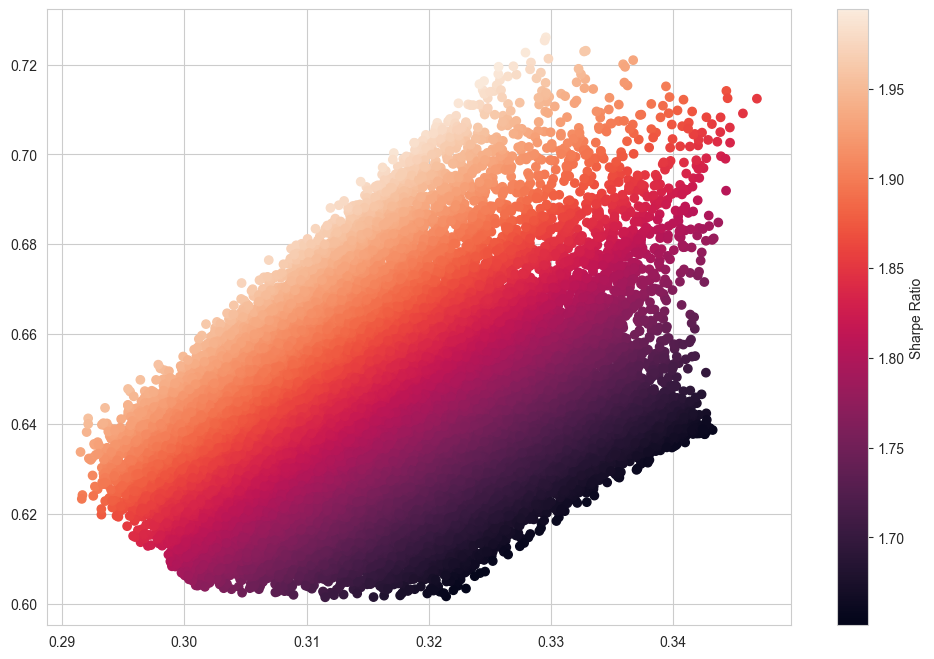

In [312]:
# plotting risk vs return scatterplot

plt.figure(figsize=(12, 8))
plt.scatter(portfolio_risks, portfolio_returns, c = sharpe_ratios, marker = 'o')
plt.grid(True)
plt.xlabel = "Expected Risk"
plt.ylabel = "Expected Return"
plt.colorbar(label = "Sharpe Ratio")
plt.show()

In [313]:
# finding out the maximum sharpe ratio

ind = np.argmax(sharpe_ratios)

print("Maximum Sharpe Ratio = ", sharpe_ratios[ind])
print("Corresponding Return = ", portfolio_returns[ind])
print("Corresponding Risk = ", portfolio_risks[ind])

Maximum Sharpe Ratio =  1.994178408665542
Corresponding Return =  0.7195329848803382
Corresponding Risk =  0.32571458103138856


In [314]:
# corresponding weights for our portfolio with max sharpe

for i in range(len(stocks_list)):
    print(stocks_list[i], " : ", portfolio_weights[ind][i])

YESBANK.NS  :  0.04605266256347569
GRASIM.NS  :  0.2567870684332638
JSWENERGY.NS  :  0.2699715521323096
CIPLA.NS  :  0.12288054290077582
TCS.NS  :  0.10379873895742442
EMAMILTD.NS  :  0.20050943501275065


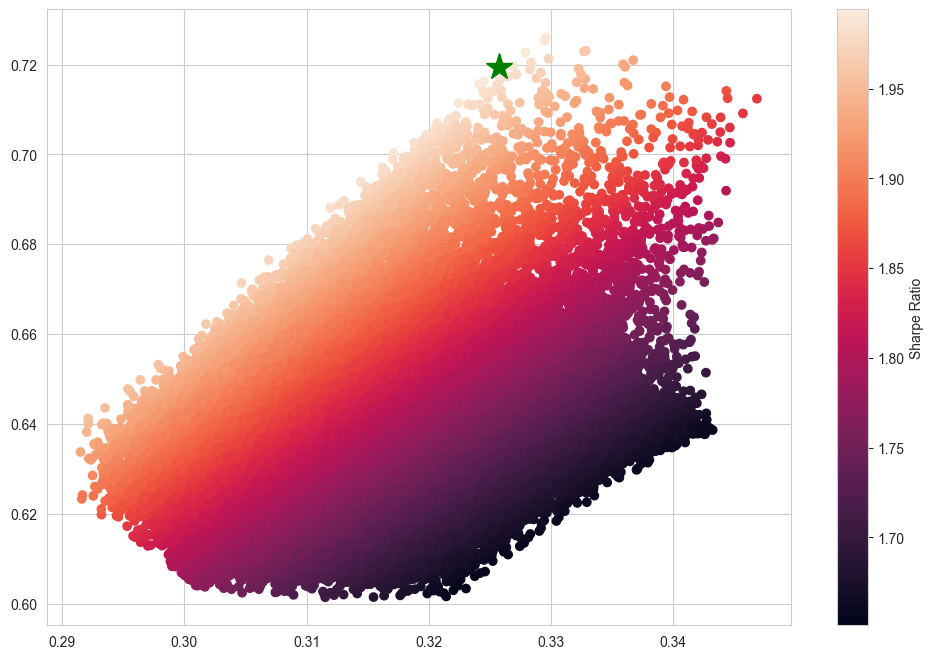

In [315]:
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_risks, portfolio_returns, c = sharpe_ratios, marker = 'o')
plt.grid(True)
plt.xlabel = "Expected Risk"
plt.ylabel = "Expected Return"
plt.colorbar(label = "Sharpe Ratio")

plt.plot(portfolio_risks[ind], portfolio_returns[ind], 'g*', markersize = 20.0)
plt.show()

In [316]:
# finding out the minimum sharpe ratio

ind = np.argmin(sharpe_ratios)

print("Minimum Sharpe Ratio = ", sharpe_ratios[ind])
print("Corresponding Return = ", portfolio_returns[ind])
print("Corresponding Risk = ", portfolio_risks[ind])

Minimum Sharpe Ratio =  1.6509711180577569
Corresponding Return =  0.6033441728369173
Corresponding Risk =  0.3230487602135381


In [317]:
# corresponding weights for our portfolio with min sharpe

for i in range(len(stocks_list)):
    print(stocks_list[i], " : ", portfolio_weights[ind][i])

YESBANK.NS  :  0.2063624946292152
GRASIM.NS  :  0.10066184928642707
JSWENERGY.NS  :  0.2000104848915846
CIPLA.NS  :  0.12003071060550138
TCS.NS  :  0.10000720841922445
EMAMILTD.NS  :  0.27292725216804725


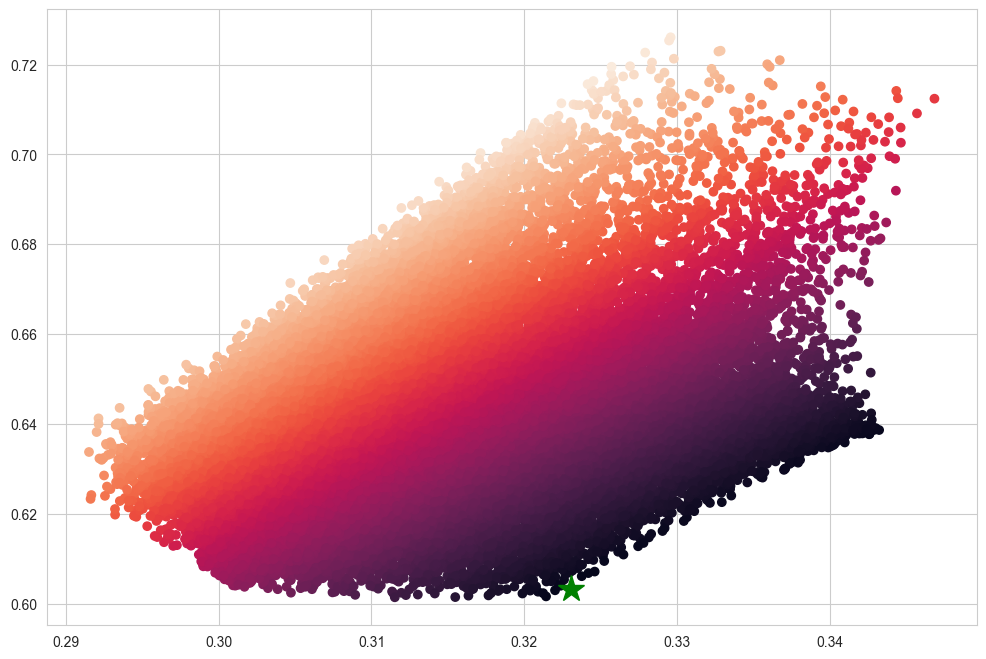

In [318]:
plt.figure(figsize=(12, 8))
plt.scatter(portfolio_risks, portfolio_returns, c = sharpe_ratios, marker = 'o')
plt.grid(True)
plt.xlabel = "Expected Risk"
plt.ylabel = "Expected Return"

plt.plot(portfolio_risks[ind], portfolio_returns[ind], 'g*', markersize = 20.0)
plt.show()

In [319]:
print(portfolio_weights.shape)
print(stock_prices.shape)

(50000, 6)
(743, 6)


In [320]:
ind = np.argmax(sharpe_ratios)
initial_investment = 10000
first_day_prices = np.array(stock_prices.iloc[0, :])
weights = portfolio_weights[ind]
individual_value_invested = weights * initial_investment
shares = individual_value_invested / first_day_prices

for i in range(shares.shape[0]):
    print("{} - values invested : {}, shares bought : {}".format(stocks_list[i], round(individual_value_invested[i], 2), round(shares[i], 2)))

YESBANK.NS - values invested : 460.53, shares bought : 34.5
GRASIM.NS - values invested : 2567.87, shares bought : 1.87
JSWENERGY.NS - values invested : 2699.72, shares bought : 23.87
CIPLA.NS - values invested : 1228.81, shares bought : 1.42
TCS.NS - values invested : 1037.99, shares bought : 0.36
EMAMILTD.NS - values invested : 2005.09, shares bought : 4.11


In [321]:
df = stock_prices.copy()
df['Portfolio Value'] = np.sum(np.array(stock_prices) * shares, axis = 1)
df

,YESBANK.NS,GRASIM.NS,JSWENERGY.NS,CIPLA.NS,TCS.NS,EMAMILTD.NS,Portfolio Value
Date,,,,,,,
2021-05-18 00:00:00+05:30,13.350000,1371.365967,113.080101,868.253479,2888.121094,487.685883,10000.000000
2021-05-19 00:00:00+05:30,13.300000,1368.706787,115.082825,887.446533,2881.763428,483.076141,10047.035182
2021-05-20 00:00:00+05:30,13.250000,1354.475098,114.692047,907.326843,2861.192627,475.187225,9997.639930
2021-05-21 00:00:00+05:30,13.350000,1351.126343,114.398964,909.977600,2880.360840,478.941589,10013.898305
2021-05-24 00:00:00+05:30,13.850000,1350.042969,114.203575,914.248108,2881.295898,486.212677,10060.727731
...,...,...,...,...,...,...,...
2024-05-13 00:00:00+05:30,22.250000,2385.199951,574.400024,1414.650024,3919.313721,518.900024,24491.371337
2024-05-14 00:00:00+05:30,22.549999,2372.050049,599.700012,1357.349976,3873.049805,515.299988,24968.595182
2024-05-15 00:00:00+05:30,22.600000,2369.699951,598.049988,1406.699951,3852.399902,526.900024,25036.640700


In [322]:
stock_prices

,YESBANK.NS,GRASIM.NS,JSWENERGY.NS,CIPLA.NS,TCS.NS,EMAMILTD.NS
Date,,,,,,
2021-05-18 00:00:00+05:30,13.350000,1371.365967,113.080101,868.253479,2888.121094,487.685883
2021-05-19 00:00:00+05:30,13.300000,1368.706787,115.082825,887.446533,2881.763428,483.076141
2021-05-20 00:00:00+05:30,13.250000,1354.475098,114.692047,907.326843,2861.192627,475.187225
2021-05-21 00:00:00+05:30,13.350000,1351.126343,114.398964,909.977600,2880.360840,478.941589
2021-05-24 00:00:00+05:30,13.850000,1350.042969,114.203575,914.248108,2881.295898,486.212677
...,...,...,...,...,...,...
2024-05-13 00:00:00+05:30,22.250000,2385.199951,574.400024,1414.650024,3919.313721,518.900024
2024-05-14 00:00:00+05:30,22.549999,2372.050049,599.700012,1357.349976,3873.049805,515.299988
2024-05-15 00:00:00+05:30,22.600000,2369.699951,598.049988,1406.699951,3852.399902,526.900024
